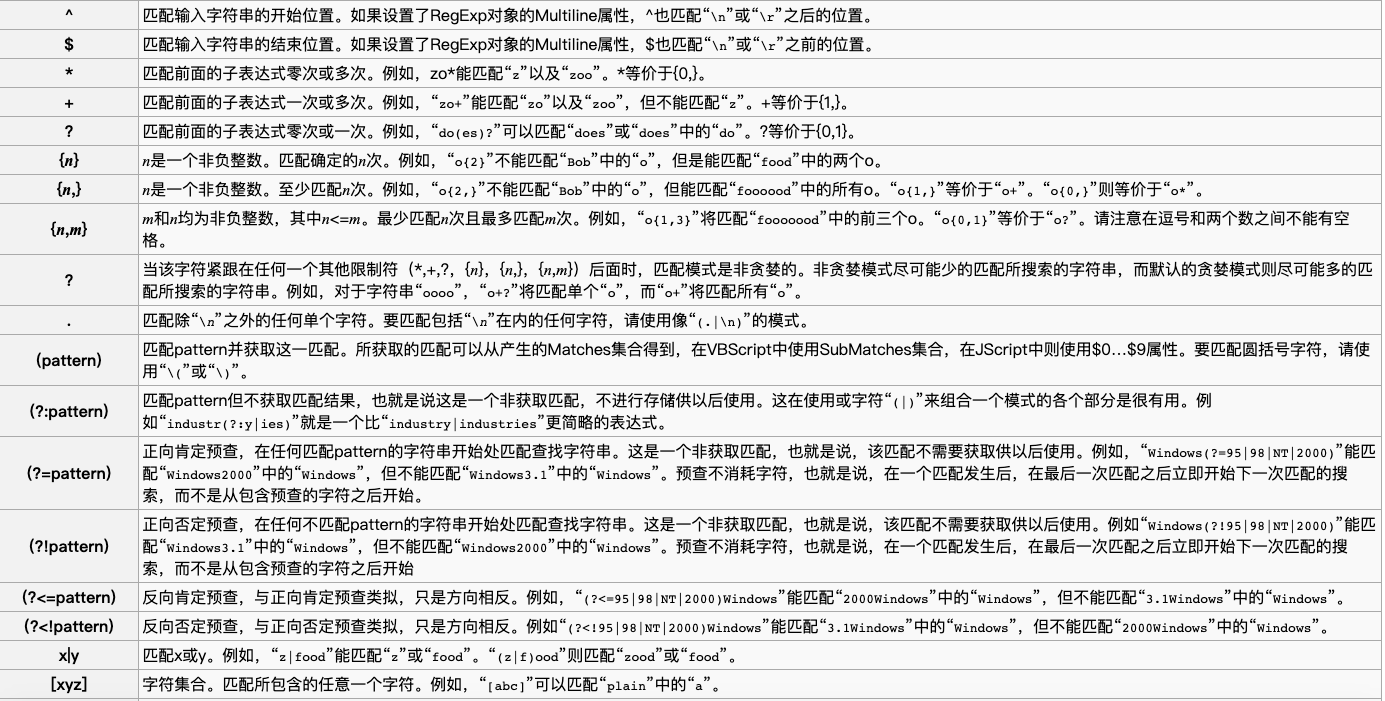

#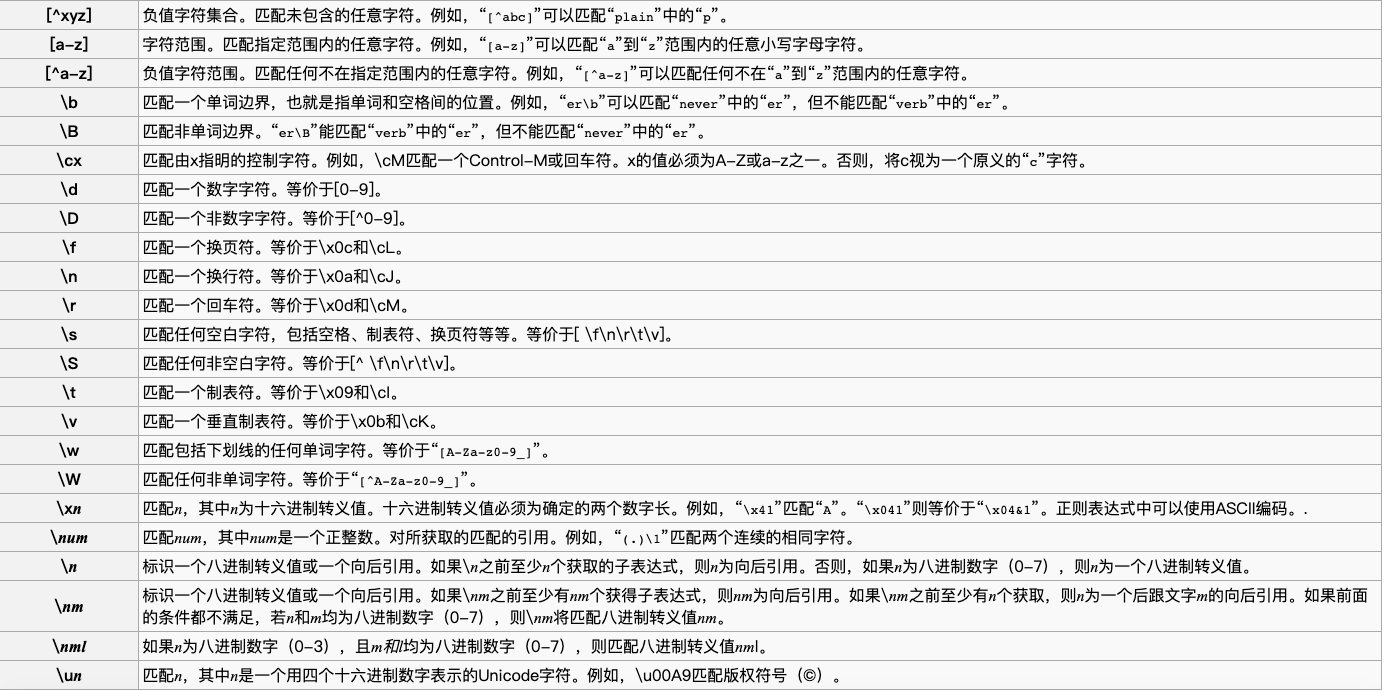

In [1]:
import requests
import re

常规匹配

In [2]:
string = 'Hello 123 4567 World_This is a Regex Demo'

result = re.match('^Hello\s\d{3}\s\d{4}\s\w{10}',string)
print(result)

<_sre.SRE_Match object; span=(0, 25), match='Hello 123 4567 World_This'>


泛匹配

In [21]:
result = re.match('^Hello.*Demo$',string)
print(result.group())
print(result.span())

Hello 123 4567 World_This is a Regex Demo
(0, 41)


匹配目标

In [22]:
# 可以用()把要匹配的字符括起来
result = re.match('^Hel.+(\d{3}\s\d{4})\s.*',string)
print(result.group(1))

123 4567


贪婪匹配

In [31]:
result = re.match('^Hel.*(\d+).*Demo$',string)
print(result.group(1))

7


非贪婪匹配

In [38]:
result = re.match('^Hel.*?(\d+\s\d+)\s.*Demo$',string)
print(result.group(1))

123 4567


修饰符

In [45]:
content = '''Hello 1234567 World_This
is a Regex Demo
'''
result = re.match('^Hel.*?(\d+)\s.*Demo$',content,re.S)
print(result.group(1))

1234567


转移匹配

In [47]:
content = 'price is $5.00'
result = re.match('^pri.*\$(5\.00)',content)
print(result.group(1))

5.00


总结：尽量使用泛匹配、使用括号得到匹配目标、尽量使用非贪婪模式、有换行符就用re.S

re.search()
扫描整个字符串并返回第一个成功的匹配

In [48]:
content = 'Extra stings Hello 1234567 World_This is a Regex Demo Extra stings'
result = re.search('Hel.*?(\d+).*Demo',content)
print(result)
print(result.group(1))

<_sre.SRE_Match object; span=(13, 53), match='Hello 1234567 World_This is a Regex Demo'>
1234567


总结：为匹配方便，能用search就不用match

In [7]:
html = '''<div id="songs-list">
    <h2 class="title">经典老歌</h2>
    <p class="introduction">
        经典老歌列表
    </p>
    <ul id="list" class="list-group">
        <li data-view="2">一路上有你</li>
        <li data-view="7">
            <a href="/2.mp3" singer="任贤齐">沧海一声笑</a>
        </li>
        <li data-view="4" class="active">
            <a href="/3.mp3" singer="齐秦">往事随风</a>
        </li>
        <li data-view="6"><a href="/4.mp3" singer="beyond">光辉岁月</a></li>
        <li data-view="5"><a href="/5.mp3" singer="陈慧琳">记事本</a></li>
        <li data-view="5">
            <a href="/6.mp3" singer="邓丽君"><i class="fa fa-user"></i>但愿人长久</a>
        </li>
    </ul>
</div>'''

result = re.search('<li.*?active.*?singer="(.*?)">(.*?)</a>',html,re.S)

print(result.group(1),result.group(2))
#

齐秦 往事随风


In [57]:
result = re.search('<li.*?singer="(.+?)">(.+?)</a>',html,re.S)
print(result.group(1),result.group(2))

任贤齐 沧海一声笑


re.findall

搜索字符串，以列表形式返回全部能匹配的子串。

In [74]:
results = re.findall('<li.*?href="(.*?)".*?singer="(.*?)".*?>(.*?)</a>',html,re.S)
print(results)
for result in results:
    print(result)

[('/2.mp3', '任贤齐', '沧海一声笑'), ('/3.mp3', '齐秦', '往事随风'), ('/4.mp3', 'beyond', '光辉岁月'), ('/5.mp3', '陈慧琳', '记事本'), ('/6.mp3', '邓丽君', '<i class="fa fa-user"></i>但愿人长久')]
('/2.mp3', '任贤齐', '沧海一声笑')
('/3.mp3', '齐秦', '往事随风')
('/4.mp3', 'beyond', '光辉岁月')
('/5.mp3', '陈慧琳', '记事本')
('/6.mp3', '邓丽君', '<i class="fa fa-user"></i>但愿人长久')


In [6]:
html = '''<div id="songs-list">
    <h2 class="title">经典老歌</h2>
    <p class="introduction">
        经典老歌列表
    </p>
    <ul id="list" class="list-group">
        <li data-view="2">一路上有你</li>
        <li data-view="7">
            <a href="/2.mp3" singer="任贤齐">沧海一声笑</a>
        </li>
        <li data-view="4" class="active">
            <a href="/3.mp3" singer="齐秦">往事随风</a>
        </li>
        <li data-view="6"><a href="/4.mp3" singer="beyond">光辉岁月</a></li>
        <li data-view="5"><a href="/5.mp3" singer="陈慧琳">记事本</a></li>
        <li data-view="5">
            <a href="/6.mp3" singer="邓丽君"><i class="fa fa-user"></i>但愿人长久</a>
        </li>
    </ul>
</div>'''

# results = re.findall('<li.*?>\s*?(<a.*?>)?(\w+)(</a>)?\s*?</li>',html,re.S)
results = re.findall('<li.*?>\s*?(<a.*?)?>(\w+)(</a>)?\s*?</li>',html,re.S)
print(results)
for result in results:
    print(result[1])

[('<a href="/2.mp3" singer="任贤齐"', '沧海一声笑', '</a>'), ('<a href="/3.mp3" singer="齐秦"', '往事随风', '</a>'), ('<a href="/4.mp3" singer="beyond"', '光辉岁月', '</a>'), ('<a href="/5.mp3" singer="陈慧琳"', '记事本', '</a>'), ('<a href="/6.mp3" singer="邓丽君"><i class="fa fa-user"></i', '但愿人长久', '</a>')]
沧海一声笑
往事随风
光辉岁月
记事本
但愿人长久


re.sub

替换字符串中每一个匹配的子串后返回替换后的字符串

In [93]:
content = 'Extra stings Hello 1234567 World_This is a Regex Demo Extra stings'
result = re.sub('\d+','',content)
print(result)

Extra stings Hello  World_This is a Regex Demo Extra stings


In [94]:
result = re.sub('\d+','replacement',content)
print(result)

Extra stings Hello replacement World_This is a Regex Demo Extra stings


In [96]:
# 替换字符中含有被替换的字符本身
result = re.sub('(\d+)',r'\1 42237462',content)
print(result)

Extra stings Hello 1234567 42237462 World_This is a Regex Demo Extra stings


In [98]:
html = '''<div id="songs-list">
    <h2 class="title">经典老歌</h2>
    <p class="introduction">
        经典老歌列表
    </p>
    <ul id="list" class="list-group">
        <li data-view="2">一路上有你</li>
        <li data-view="7">
            <a href="/2.mp3" singer="任贤齐">沧海一声笑</a>
        </li>
        <li data-view="4" class="active">
            <a href="/3.mp3" singer="齐秦">往事随风</a>
        </li>
        <li data-view="6"><a href="/4.mp3" singer="beyond">光辉岁月</a></li>
        <li data-view="5"><a href="/5.mp3" singer="陈慧琳">记事本</a></li>
        <li data-view="5">
            <a href="/6.mp3" singer="邓丽君"><i class="fa fa-user"></i>但愿人长久</a>
        </li>
    </ul>
</div>'''
html = re.sub('<a.*?>|</a>','',html)
print(html)

<div id="songs-list">
    <h2 class="title">经典老歌</h2>
    <p class="introduction">
        经典老歌列表
    </p>
    <ul id="list" class="list-group">
        <li data-view="2">一路上有你</li>
        <li data-view="7">
            沧海一声笑
        </li>
        <li data-view="4" class="active">
            往事随风
        </li>
        <li data-view="6">光辉岁月</li>
        <li data-view="5">记事本</li>
        <li data-view="5">
            <i class="fa fa-user"></i>但愿人长久
        </li>
    </ul>
</div>


In [114]:
result = re.findall('<li.*?>\s*?(\w+)\s*?</li>',html,re.S)
for res in result:
    print(res)

一路上有你
沧海一声笑
往事随风
光辉岁月
记事本
但愿人长久


re.compile

将一个正则表达式串编译成正则对象，以便于复用该匹配模式

In [115]:
content = '''Hello 1234567 World_This
is a Regex Demo'''
pattern = re.compile('Hello.*Demo',re.S)
result = re.search(pattern,content)
#re.search('Hello.*Demo',content,re.S)
print(result)

<_sre.SRE_Match object; span=(0, 40), match='Hello 1234567 World_This\nis a Regex Demo'>


实战练习

In [14]:
content = requests.get('https://book.douban.com/').text
print(content)



<!DOCTYPE html>
<html lang="zh-CN" class=" book-new-nav">
  <head>
    <meta charset="utf-8">
    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">
    
  <meta http-equiv="mobile-agent" content="format=xhtml; url=http://m.douban.com/book/">
  <meta name="keywords" content="豆瓣读书,新书速递,畅销书,书评,书单"/>
  <meta name="description" content="记录你读过的、想读和正在读的书，顺便打分，添加标签及个人附注，写评论。根据你的口味，推荐适合的书给你。" />
  <meta name="verify-v1" content="EYARGSAVd5U+06FeTmxO8Mj28Fc/hM/9PqMfrlMo8YA=">
  <meta property="wb:webmaster" content="7c86191e898cd20d">
  <meta property="qc:admins" content="1520412177364752166375">

    <title>
    豆瓣读书
</title>
    <link rel="shortcut icon" href="https://img3.doubanio.com/favicon.ico"
      type="image/x-icon">
    <script src="https://img3.doubanio

In [15]:

pattern = re.compile('<li cl.*?cover.*?<a href="(.*?)" title="(.*?)">.*?<p>\s*?<span.*?author">(.*?)</span>.*?<span.*?year">(.*?)</span>.*?<span.*?publisher">(.*?)</span>'
                    ,re.S)
results = re.findall(pattern,content)

In [18]:
for result in results:
    print(result[0],result[1].strip(),result[2].strip(),result[3].strip(),result[4].strip())

https://book.douban.com/subject/26902565/?icn=index-latestbook-subject 卡洛琳字体 [英] 安德鲁·泰勒 2019-4 新星出版社
https://book.douban.com/subject/30346158/?icn=index-latestbook-subject 纳博科夫最喜欢的词 [美]本·布拉特 2019-4 低音·北京联合出版公司
https://book.douban.com/subject/30407792/?icn=index-latestbook-subject 伙伴进行曲 [德] 埃里希·玛丽亚·雷马克 2019-3 上海人民出版社
https://book.douban.com/subject/30473907/?icn=index-latestbook-subject 坏血 [美]约翰·卡雷鲁（John Carreyrou） 2019-4 雅众文化/北京联合出版公司
https://book.douban.com/subject/30358510/?icn=index-latestbook-subject 重逢 [英]弗雷德·乌尔曼 2019-4 理想国丨广西师范大学出版社
https://book.douban.com/subject/30483768/?icn=index-latestbook-subject 秋水堂论金瓶梅 田晓菲 2019-3 广西师范大学出版社
https://book.douban.com/subject/30482656/?icn=index-latestbook-subject 水浒群星闪耀时 李黎 2019-4 上海文艺出版社
https://book.douban.com/subject/30389630/?icn=index-latestbook-subject 重于天堂 (美) 查尔斯·R.克罗斯 (Charles R. Cross) 2019-4 上海三联书店
https://book.douban.com/subject/33386710/?icn=index-latestbook-subject 七侯笔录 马伯庸 2019-4-15 湖南文艺出版社
https://book.douban.com/subject/30319

In [ ]:
'<li.*?cover.*?href="(.*?)".*?title="(.*?)".*?more-meta.*?author">(.*?)</span>.*?year">(.*?)</span>.*?</li>'
'<li.*?cover.*?href="(.*?)".*?title="(.*?)".*?author">(.*?)</div>.*?more-meta.*?year">(.*?)</span>.*?publisher">(.*?)</span>.*?</li>'